## How To Solve A Geometry Problem Using Computational Methods

What we do in computational physics.



In [2]:
#import what we need.
import matplotlib.pyplot as plt #ploting tools
import random #random number generator
import numpy as np

The Problem: Find the Bule Area.

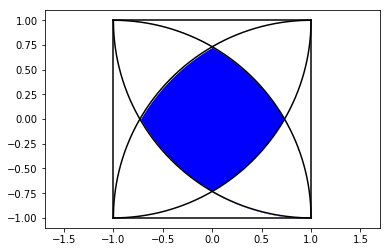

In [28]:
#probem (neglect this part! this is just for ploting the problem's shape.):
x=[-1,1]
y=[1,1]
plt.plot(x,y,color='black')
x=[-1,1]
y=[-1,-1]
plt.plot(x,y,color='black')
x=[1,1]
y=[-1,1]
plt.plot(x,y,color='black')
x=[-1,-1]
y=[-1,1]
plt.plot(x,y,color='black')
x= np.linspace(-1,1,1000)
y1=np.sqrt(4-(x-1)**2)-1
plt.plot(x,y1,color='black')
y2=np.sqrt(4-(x+1)**2)-1
b=plt.plot(x,y2,color='black')
y3=-1*np.sqrt(4-(x+1)**2)+1
plt.plot(x,y3,color='black')
y4=-1*np.sqrt(4-(x-1)**2)+1
plt.plot(x,y4,color='black')
plt.fill_between(x,y2,y4,color='blue')
plt.fill_between(x,y1,y2,color='white')
plt.fill_between(x,y3,y4,color='white')
plt.axis('equal')
plt.savefig('./shape.eps',format='EPS')
plt.show()

Start to solve the problem using monte carlo method.
![](./shape6.png)

In [2]:
def MC_NS(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(0.0, 2.0), random.uniform(0.0, 2.0)
        if (x ** 2 + y ** 2 < 4.0 and
        (x-2) ** 2 + y ** 2 < 4.0 and
        x ** 2 + (y-2) ** 2 < 4.0 and
        (x-2) ** 2 + (y-2) ** 2 < 4.0):
            n_hits += 1
    return n_hits

In [3]:
n_runs = 200
n_trials = 4000
sumS=0.0
for run in range(n_runs):
    sumS += (MC_NS(n_trials) / float(n_trials))
    #print (NS(n_trials) / float(n_trials))
print(4*sumS/float(n_runs))

1.2604999999999997


In [4]:
def MCMC_NS(N, delta,x0,y0): 
    x, y = x0, y0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if ((x+1) ** 2 + (y+1) ** 2 < 4.0 and
            (x-1) ** 2 + (y+1) ** 2 < 4.0 and
            (x+1) ** 2 + (y-1) ** 2 < 4.0 and
            (x-1) ** 2 + (y-1) ** 2 < 4.0): n_hits += 1
    return n_hits

In [5]:
n_runs = 200
n_trials = 4000
delta = 0.2
sumS=0.0
for run in range(n_runs):
    xx,yy= random.uniform(-1.0,1.0),random.uniform(-1.0,1.0)
    sumS += (MCMC_NS(n_trials,delta,xx,yy) / float(n_trials))
print(4*sumS/float(n_runs))

1.2554600000000002


Now, we try to find a formula for the area as a function of radius r
![](./shape5.png)
<br>
Next Step:


In [6]:
def MCMC_NS_r(N, delta,x0,y0,r): 
    x, y = x0, y0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < r/2 and abs(y + del_y) < r/2:
            x, y = x + del_x, y + del_y
        if ((x+r/2) ** 2 + (y+r/2) ** 2 < r**2 and
            (x-r/2) ** 2 + (y+r/2) ** 2 < r**2 and
            (x+r/2) ** 2 + (y-r/2) ** 2 < r**2 and
            (x-r/2) ** 2 + (y-r/2) ** 2 < r**2): n_hits += 1
    return n_hits

In [7]:
def n_Run(nr,nt,d,r):
    sumS=0.0
    for run in range(nr):
        xx,yy= random.uniform(-1.0*r/2,1.0*r/2),random.uniform(-1.0*r/2,1.0*r/2)
        sumS += (MCMC_NS_r(nt,d,xx,yy,r) / float(nt))
    return (r**2)*sumS/float(nr)

In [8]:
r=1.00
rm=1.20
n_runs = 100
n_trials = 2000
delta = 0.2
for i in range(0,5):
    print("R = ",round(r,2), " , S = ",round(n_Run(n_runs, n_trials, delta, r),2))
    r=r*rm

R =  1.0  , S =  0.32
R =  1.2  , S =  0.45
R =  1.44  , S =  0.65
R =  1.73  , S =  0.94
R =  2.07  , S =  1.35


In [9]:
r=1.00
rm=1.20
n_runs = 1000
n_trials = 4000
delta = 0.2
ri=[]
si=[]
for i in range(0,10):
    ri.append(r)
    si.append(n_Run(n_runs, n_trials, delta, r))
    r=r*rm

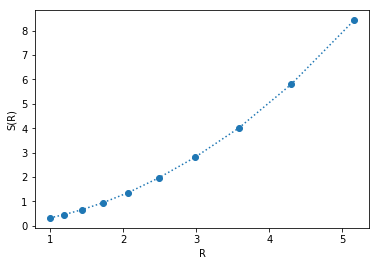

In [11]:
plt.plot(ri,si,linestyle=":",marker='o')
plt.xlabel('R')
plt.ylabel('S(R)')
plt.show()

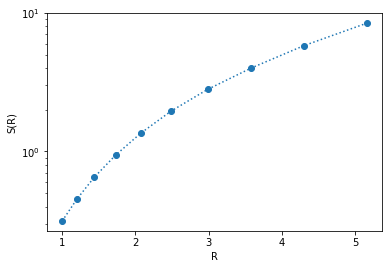

In [12]:
plt.plot(ri,si,linestyle=":",marker='o')
plt.yscale('log')
plt.xlabel('R')
plt.ylabel('S(R)')
plt.show()

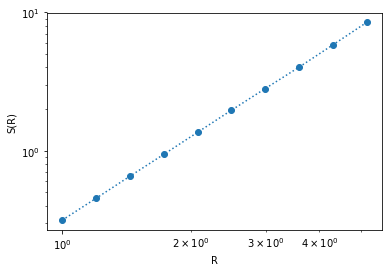

In [13]:
plt.loglog(ri,si,linestyle=":",marker='o')
plt.xlabel('R')
plt.ylabel('S(R)')
plt.show()

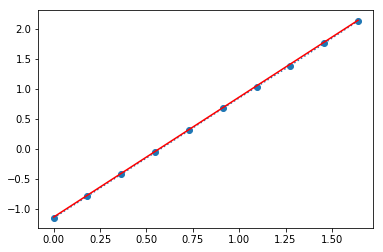

In [30]:
import numpy as np
lri=np.log(np.array(ri))
lsi=np.log(np.array(si))
plt.plot(lri,lsi,linestyle=":",marker='o')
c1=2.0
c2=0.32
plt.plot(lri,c1*lri+np.log(c2),color='red')
plt.show()

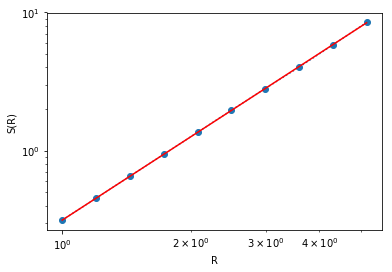

In [33]:
c=0.315
alpha=2.0
fitF=[]
for rj in ri:
    fitF.append(c*(rj**alpha))
plt.loglog(ri,si,linestyle=":",marker='o')
plt.loglog(ri,fitF,color='red')
plt.xlabel('R')
plt.ylabel('S(R)')
plt.show()

### So the result from computational method is:
$ S \sim 0.315 r^{2}$

### Now let solve it analytically:

one can easily calculate the colored area

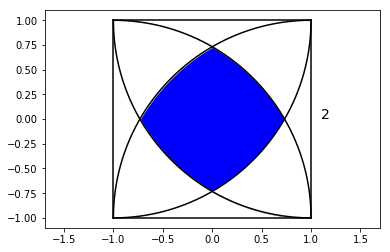

In [62]:
#probem (neglect this part! this is just for ploting the problem's shape.):
x=[-1,1]
y=[1,1]
plt.plot(x,y,color='black')
x=[-1,1]
y=[-1,-1]
plt.plot(x,y,color='black')
x=[1,1]
y=[-1,1]
plt.plot(x,y,color='black')
x=[-1,-1]
y=[-1,1]
plt.plot(x,y,color='black')
x= np.linspace(-1,1,1000)
y1=np.sqrt(4-(x-1)**2)-1
plt.plot(x,y1,color='black')
y2=np.sqrt(4-(x+1)**2)-1
b=plt.plot(x,y2,color='black')
y3=-1*np.sqrt(4-(x+1)**2)+1
plt.plot(x,y3,color='black')
y4=-1*np.sqrt(4-(x-1)**2)+1
plt.plot(x,y4,color='black')
plt.fill_between(x,y2,y4,color='blue')
plt.fill_between(x,y1,y2,color='white')
plt.fill_between(x,y3,y4,color='white')
plt.text(1.1,0,'2',fontsize=14)
#plt.text(0,1.1,'2',fontsize=14)
#plt.fill_between(x,y1,y2,color='white')
plt.axis('equal')
#plt.axis('off')
plt.savefig('./shape6.png',format='PNG')
plt.show()